In [2]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Loading the dataset

df = pd.read_csv("advertising.csv")
# Printing first 5 rows

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


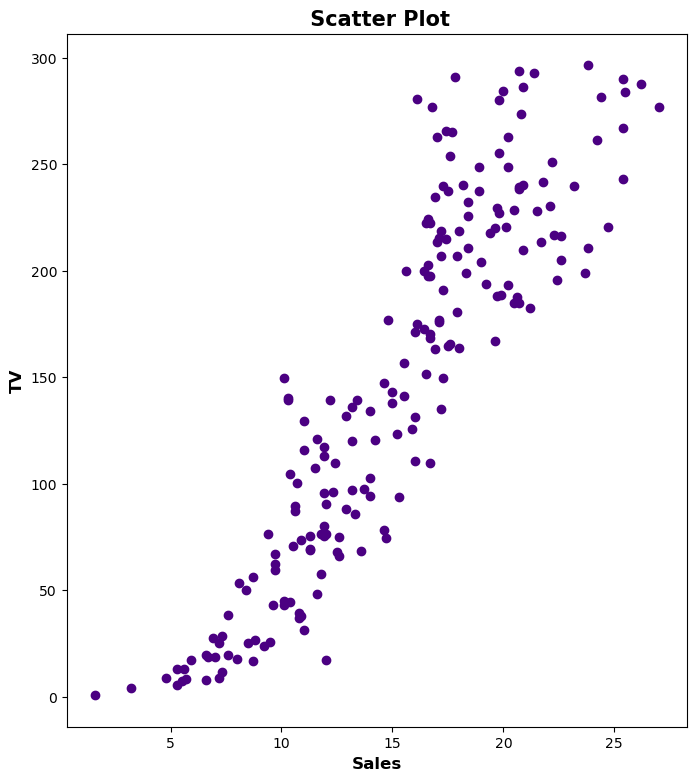

In [10]:
plt.figure(figsize=(8,9))
plt.scatter(x=df['Sales'], y=df['TV'], color="indigo")

plt.xlabel('Sales', fontsize=12, fontweight='bold')
plt.ylabel('TV', fontsize=12, fontweight='bold')
plt.title(' Scatter Plot', fontsize=15, fontweight='bold')

plt.show()

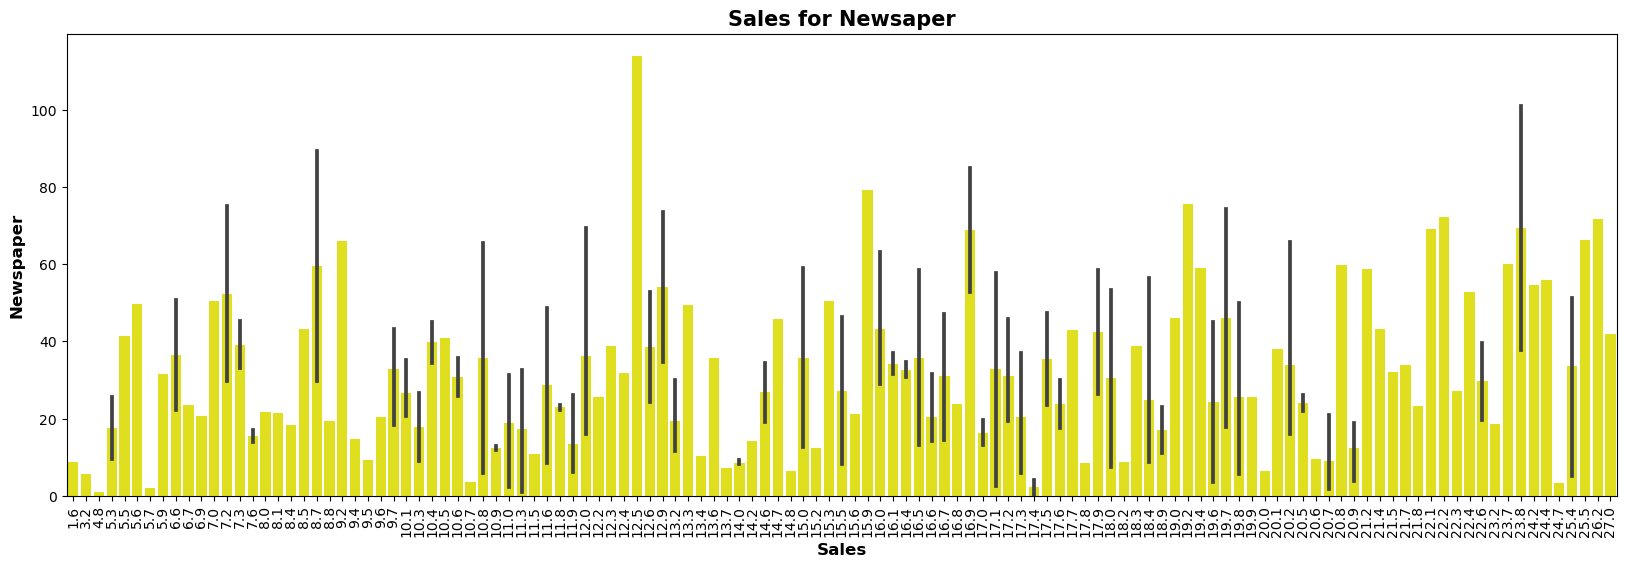

In [14]:
# Plotting : Bar Plot

plt.figure(figsize=(20,6))
sns.barplot(x=df['Sales'], y=df['Newspaper'], color="yellow")
plt.xticks(rotation=90)

plt.xlabel('Sales', fontsize=12, fontweight='bold')
plt.ylabel('Newspaper', fontsize=12, fontweight='bold')
plt.title('Sales for Newsaper', fontsize=15, fontweight='bold')
plt.show()